# Monet using GAN

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# import tensorflow_addons as tfa
# from kaggle_datasets import KaggleDatasets

if os.path.exists(r'C:\Users\kuusnin\tempwork\temp\gan-getting-started'):
    datapath = r'C:\Users\kuusnin\tempwork\temp\gan-getting-started'
else:
    datapath = r'C:\Users\nikok\Documents\Monet using GAN'



## Brief description of the problem and data (5 pts)

*Briefly describe the challenge problem and NLP. Describe the size, dimension, structure, etc., of the data.*

In [13]:
monet_filenames = [os.path.join(datapath, 'monet_tfrec', f) for f in os.listdir(os.path.join(datapath, 'monet_tfrec'))]
photo_filenames = [os.path.join(datapath, 'photo_tfrec', f) for f in os.listdir(os.path.join(datapath, 'photo_tfrec'))]
monet_filenames
photo_filenames

['C:\\Users\\nikok\\Documents\\Monet using GAN\\photo_tfrec\\photo00-352.tfrec',
 'C:\\Users\\nikok\\Documents\\Monet using GAN\\photo_tfrec\\photo01-352.tfrec',
 'C:\\Users\\nikok\\Documents\\Monet using GAN\\photo_tfrec\\photo02-352.tfrec',
 'C:\\Users\\nikok\\Documents\\Monet using GAN\\photo_tfrec\\photo03-352.tfrec',
 'C:\\Users\\nikok\\Documents\\Monet using GAN\\photo_tfrec\\photo04-352.tfrec',
 'C:\\Users\\nikok\\Documents\\Monet using GAN\\photo_tfrec\\photo05-352.tfrec',
 'C:\\Users\\nikok\\Documents\\Monet using GAN\\photo_tfrec\\photo06-352.tfrec',
 'C:\\Users\\nikok\\Documents\\Monet using GAN\\photo_tfrec\\photo07-352.tfrec',
 'C:\\Users\\nikok\\Documents\\Monet using GAN\\photo_tfrec\\photo08-352.tfrec',
 'C:\\Users\\nikok\\Documents\\Monet using GAN\\photo_tfrec\\photo09-352.tfrec',
 'C:\\Users\\nikok\\Documents\\Monet using GAN\\photo_tfrec\\photo10-352.tfrec',
 'C:\\Users\\nikok\\Documents\\Monet using GAN\\photo_tfrec\\photo11-352.tfrec',
 'C:\\Users\\nikok\\Document

# figure out how to explore tfrec files

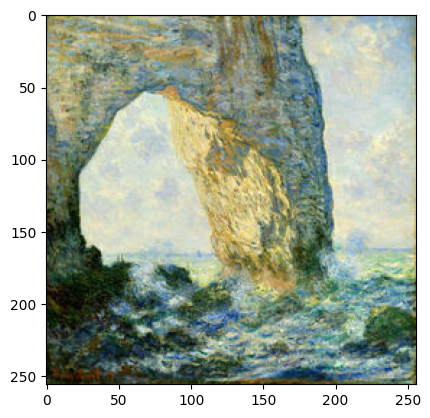

In [29]:
def parse_tfrecord_fn(example):
    feature_description = {
        "image_name": tf.io.FixedLenFeature([], tf.string),
        "image": tf.io.FixedLenFeature([], tf.string),
        "target": tf.io.FixedLenFeature([], tf.string)
    }
    example = tf.io.parse_single_example(example, feature_description)
    example["image"] = tf.io.decode_jpeg(example["image"], channels=3)
    # example["bbox"] = tf.sparse.to_dense(example["bbox"])
    return example
    # image = tf.io.decode_jpeg(image, channels=3)
    # return image

raw_monet_dataset = tf.data.TFRecordDataset(monet_filenames)
parsed_dataset = raw_monet_dataset.map(parse_tfrecord_fn)

for data in parsed_dataset.take(1):
    plt.imshow(data['image'].numpy())

In [19]:
IMAGE_SIZE = [256, 256]
print(IMAGE_SIZE + [3])
print([*IMAGE_SIZE, 3])

[256, 256, 3]
[256, 256, 3]


## Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data (15 pts)

*Show a few visualizations like histograms. Describe any data cleaning procedures. Based on your EDA, what is your plan of analysis?*

## Model Architecture (25 pts)

*Describe your model architecture and reasoning for why you believe that specific architecture would be suitable for this problem.*

*Since we did not learn NLP-specific techniques such as word embeddings in the lectures, we recommend looking at Kaggle tutorials, discussion boards, and code examples posted for this challenge.  You can use any resources needed, but make sure you “demonstrate” you understood by including explanations in your own words. Also importantly, please have a reference list at the end of the report.*

*There are many methods to process texts to matrix form (word embedding), including TF-IDF, GloVe, Word2Vec, etc. Pick a strategy and process the raw texts to word embedding. Briefly explain the method(s) and how they work in your own words.*

*Build and train your sequential neural network model (You may use any RNN family neural network, including advanced architectures LSTM, GRU, bidirectional RNN, etc.).*

## Results and Analysis (35 pts)

*Run hyperparameter tuning, try different architectures for comparison, apply techniques to improve training or performance, and discuss what helped.*

*Includes results with tables and figures. There is an analysis of why or why not something worked well, troubleshooting, and a hyperparameter optimization procedure summary.*

## Conclusion (15 pts)

*Discuss and interpret results as well as learnings and takeaways. What did and did not help improve the performance of your models? What improvements could you try in the future?*

# Sources

https://www.kaggle.com/code/amyjang/monet-cyclegan-tutorial
